In [1]:
!ls datasets/.cache

101_ObjectCategories.tar.gz  wider_face_split.zip  WIDER_train.zip
wider_face_split	     WIDER_test.zip	   WIDER_val.zip


In [25]:
import os.path
from collections import namedtuple

import numpy as np
from PIL import Image

In [26]:
TRAIN_METADATA_PATH = 'datasets/.cache/wider_face_split/wider_face_train_bbx_gt.txt'
VAL_METADATA_PATH = 'datasets/.cache/wider_face_split/wider_face_val_bbx_gt.txt'

In [38]:
Face = namedtuple('Face', ['x', 'y', 'width', 'height', 'blur', 'expression', 'illumination', 'invalid', 'occlusion', 'pose'])
Metadata = namedtuple('Metadata', ['img_paths', 'faces'])

In [80]:
def parse_metadata(path):
    
    img_paths = []
    faces = {}
    
    with open(path) as f:
        
        while True:   
            img_path = f.readline().strip('\n')
            
            # Check if EOF is reached
            if img_path == '':
                break
            
            img_paths.append(img_path)
            
            num_faces = int(f.readline())       
            contained_faces = [Face(*map(int, f.readline().strip(' \n').split(' '))) for _ in range(num_faces)]
            faces[img_path] = contained_faces
            
    img_paths = np.array(img_paths)
    return Metadata(img_paths, faces)

In [81]:
train_metadata = parse_metadata(TRAIN_METADATA_PATH)
val_metadata = parse_metadata(VAL_METADATA_PATH)

In [82]:
TEST_METADATA_PATH = 'datasets/.cache/wider_face_split/wider_face_test_filelist.txt'

In [83]:
test_img_paths = []

with open(TEST_METADATA_PATH) as f:
    test_img_paths = [l.strip('\n') for l in f.readlines()]
    
test_img_paths = np.array(test_img_paths)
test_faces = { img: None for img in test_img_paths }

test_metadata = Metadata(test_img_paths, test_faces)

In [84]:
metadata = {
    'train': train_metadata,
    'val': val_metadata,
    'test': test_metadata
}

In [85]:
import pickle

In [86]:
pickle.dump(metadata, open('datasets/wider_face/metadata.pickle', 'wb'))

In [60]:
!ls datasets/wider_face/

metadata.pickle  test  train  validation


In [87]:
train_dataset_path = 'datasets/wider_face/train/'

In [88]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
from data import wider_face

In [103]:
data = wider_face.load_data()

In [104]:
data

{'train': <data.wider_face.Dataset at 0x7f17b291d128>,
 'val': <data.wider_face.Dataset at 0x7f17b2860ba8>,
 'test': <data.wider_face.Dataset at 0x7f17b2860278>}

In [108]:
images, faces = next(data['train'].batch(5))

In [117]:
from PIL import ImageDraw

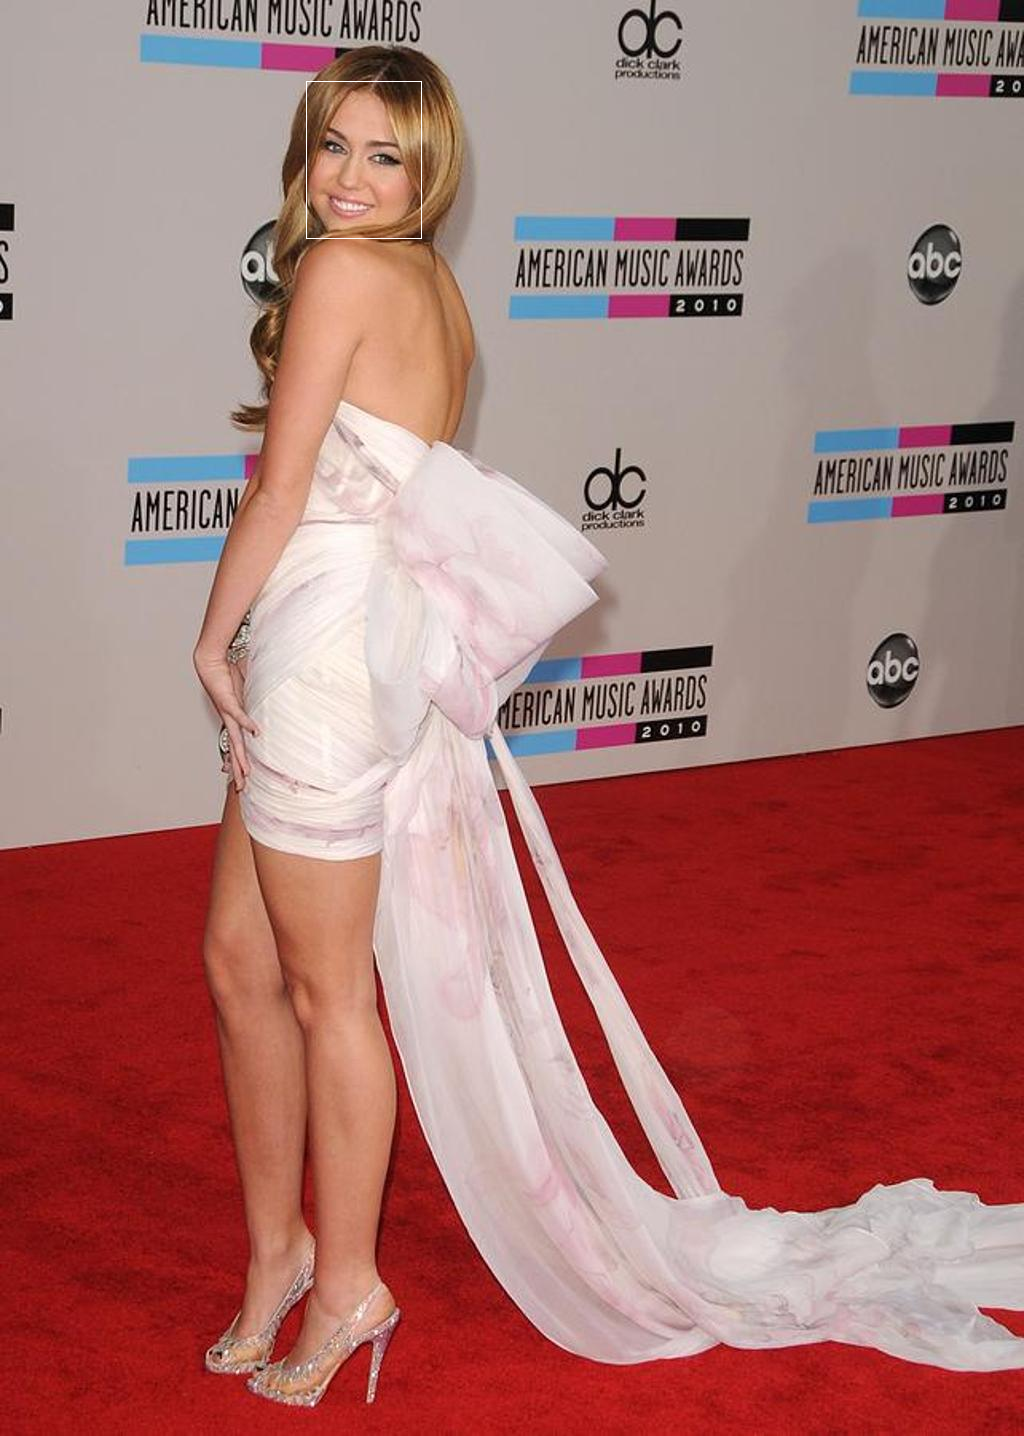

In [121]:
im = images[2]
f = faces[2]

draw = ImageDraw.Draw(im)

for face in f:
    draw.rectangle([face.x, face.y, face.x+face.width, face.y+face.height])
    
im

In [115]:
faces[0]

[Face(x=362, y=111, width=45, height=42, blur=1, expression=0, illumination=0, invalid=0, occlusion=0, pose=0),
 Face(x=501, y=101, width=46, height=41, blur=2, expression=0, illumination=0, invalid=0, occlusion=1, pose=0)]